# Figure 4 - Ye et al. 2023

- import dependencies
- note, this requires `cebra`

In [ ]:
import cebra.integrations.matplotlib as cebra_plot
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import FastICA

sns.set_style('ticks')

# Display box plots of (un)supported rearing F1 scores 

/var/folders/gs/_fph0b7x04b_0w0zzc9gjwqc0000gn/T/ipykernel_24022/2896790188.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('GnBu', 6)(range(4))
/var/folders/gs/_fph0b7x04b_0w0zzc9gjwqc0000gn/T/ipykernel_24022/2896790188.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Greys', 6)(range(4))


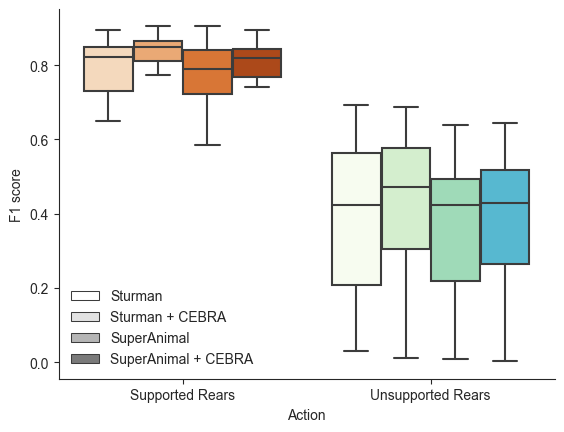

In [5]:
def plot_figure3d():
    df = pd.read_csv('../data/Figure4/rears.csv', sep=';', header=[0], index_col=0)
    box = sns.boxplot(data=df, x="action", y="f1", hue="method", palette='Oranges', flierprops=dict(markersize=0), hue_order=['Sturman', 'Sturman + CEBRA', 'SuperAnimal', 'SuperAnimal + CEBRA'])
    colors = plt.cm.get_cmap('GnBu', 6)(range(4))
    for patch, color in zip(box.patches[-4:], colors):
        patch.set_facecolor(color)
    sns.despine()
    leg = plt.legend(loc='lower left', frameon=False)
    colors = plt.cm.get_cmap('Greys', 6)(range(4))
    for patch, color in zip(leg.get_patches(), colors):
        patch.set_facecolor(color)
    plt.xlabel('Action')
    plt.ylabel('F1 score')
    
plot_figure3d()

# Visualize SuperAnimal and Sturman latent spaces with CEBRA

/Users/jessy/miniconda/envs/dlc/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/jessy/miniconda/envs/dlc/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


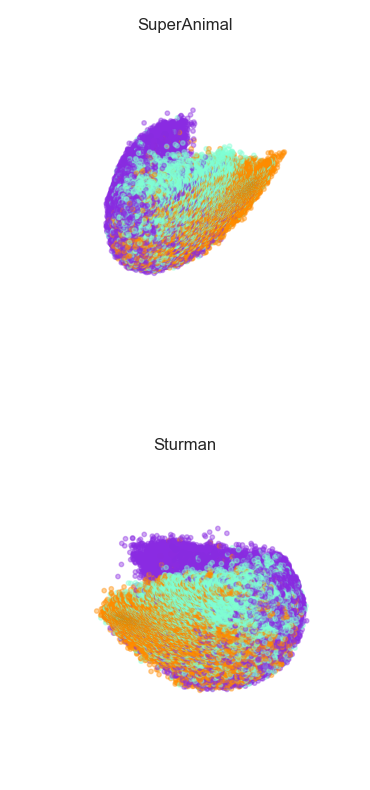

In [9]:
def plot_figure3e():
    cmap = ListedColormap(['blueviolet', 'darkorange', 'aquamarine'])  # other, supported, unsupported
    pca = FastICA(n_components=3, fun='exp')

    emb_train_sa, y_train_sa, *_ = joblib.load('../data/Figure4/emb_sa.pth')
    emb_train_sa = pca.fit_transform(emb_train_sa)
    emb_train_sturman, y_train_sturman, *_ = joblib.load('../data/Figure4/emb_sturman.pth')
    emb_train_sturman = pca.fit_transform(emb_train_sturman)
    
    fig = plt.figure(figsize=(5, 10))

    ax1 = fig.add_subplot(2, 1, 1, projection='3d')
    ax1.view_init(elev=31, azim=-13)
    ax1.axis('off')
    cebra_plot.plot_embedding(
        emb_train_sa, y_train_sa, cmap=cmap,
        ax=ax1, alpha=.4, markersize=10,
        title='SuperAnimal',
    )
    
    ax2 = fig.add_subplot(2, 1, 2, projection='3d')
    ax2.view_init(elev=31, azim=-13)
    ax2.axis('off')
    cebra_plot.plot_embedding(
        emb_train_sturman, y_train_sturman, cmap=cmap,
        ax=ax2, alpha=.4, markersize=10,
        title='Sturman'
    )

plot_figure3e()

# Compute matrices of correlation between SuperAnimal's and human annotators' rear count

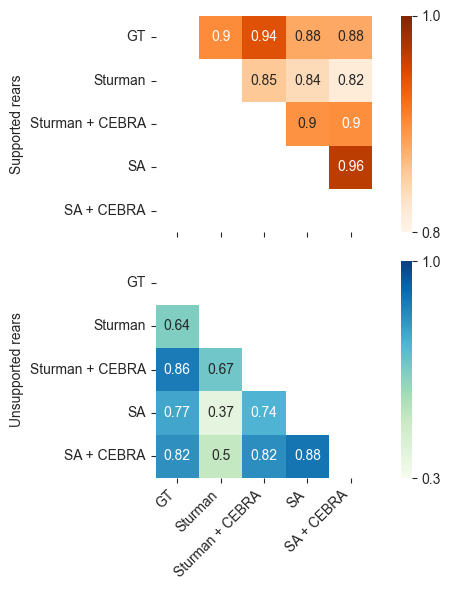

In [8]:
def plot_figure3f():
    cmap = 'GnBu'
    table = pd.read_csv('../data/Figure4/corrmat.csv', sep=';', header=[0, 1], index_col=0)
    fig, axes = plt.subplots(nrows=2, figsize=(6, 6))
    corr_sup = table.loc(axis=1)[['sup_gt', 'sup']].corr()
    inds = np.diag_indices(5)
    corr_sup.to_numpy()[inds] = np.nan
    triu = np.triu(corr_sup)
    corr_unsup = table.loc(axis=1)[['unsup_gt', 'unsup']].corr()
    tril = np.tril(corr_unsup)
    corr_unsup.to_numpy()[inds] = np.nan
    sns.heatmap(corr_sup, vmin=0.8, vmax=1, mask=tril, cmap='Oranges', annot=True, ax=axes[0], cbar_kws={'ticks': [.8, 1]})
    sns.heatmap(corr_unsup, vmin=0.3, vmax=1, mask=triu, cmap=cmap, annot=True, ax=axes[1], cbar_kws={'ticks': [0.3, 1]})
    axes[0].set_ylabel('Supported rears')
    axes[0].set_xticklabels('')
    axes[0].set_xlabel('')
    axes[0].set_aspect('equal')
    axes[1].set_ylabel('Unsupported rears')
    axes[1].set_aspect('equal')
    labels = ['GT', 'Sturman', 'Sturman + CEBRA', 'SA', 'SA + CEBRA']
    axes[1].set_xticklabels(
        labels,
        rotation=45,
        ha='right',
    )
    axes[1].set_yticklabels(labels)
    axes[0].set_yticklabels(labels)
    axes[1].set_xlabel('')
    fig.set_tight_layout(True)
    
plot_figure3f()